# **Case Study - Classification**

* Objective

  * This case study focuses on using classification algorithms to predict whether a patient has diabetes based on health indicators. By applying multiple supervised learning models, we aim to explore which algorithms perform best on this medical dataset and understand their behavior in binary classification problems.

* Dataset Overview

  * The dataset includes 768 records with 8 input features such as:

    * Pregnancies

    * Glucose

    * Blood Pressure

    * Skin Thickness

    * Insulin

    * BMI

    * Diabetes Pedigree Function

    * Age

    * The target variable is Outcome (0 = non-diabetic, 1 = diabetic).

* Approach

  * The project follows a structured data science pipeline:

    * Data Exploration & Cleaning – Identifying and handling outliers, missing values, and skewed distributions.

    * Feature Scaling & Splitting – Preparing the data for model training using stratified splits and standardization.

    * Model Building – Training and evaluating various algorithms including:

      * Logistic Regression

      * Support Vector Machine

      * K-Nearest Neighbors

      * Decision Tree

      * Naive Bayes

      * Random Forest

      * XGBoost

  * Model Evaluation – Using accuracy, confusion matrix, and classification report to assess performance.

  * Cross-Validation – Ensuring model robustness using 5-fold cross-validation.

* Goal

  * To identify which model provides the most accurate and generalizable predictions for diabetes detection and to understand the behavior and strengths of each algorithm when applied to medical data.




In [1]:
# @title
#import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# @title
# reading the dataset
data = pd.read_csv('/content/drive/MyDrive/colab_files/diabetes (1).csv')

# Gathering Basic Details

In [3]:
# @title
#getting the first five columns
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
# @title
#getting info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
# @title
# checking for null values
data.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [6]:
# @title
data.duplicated().sum()

np.int64(0)

In [7]:
# @title
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [8]:
# @title
#checking for the count of '0' values in each column except outcome
(data[data.columns[:-1]] == 0).sum()

,0
Pregnancies,111
Glucose,5
BloodPressure,35
SkinThickness,227
Insulin,374
BMI,11
DiabetesPedigreeFunction,0
Age,0


# EDA

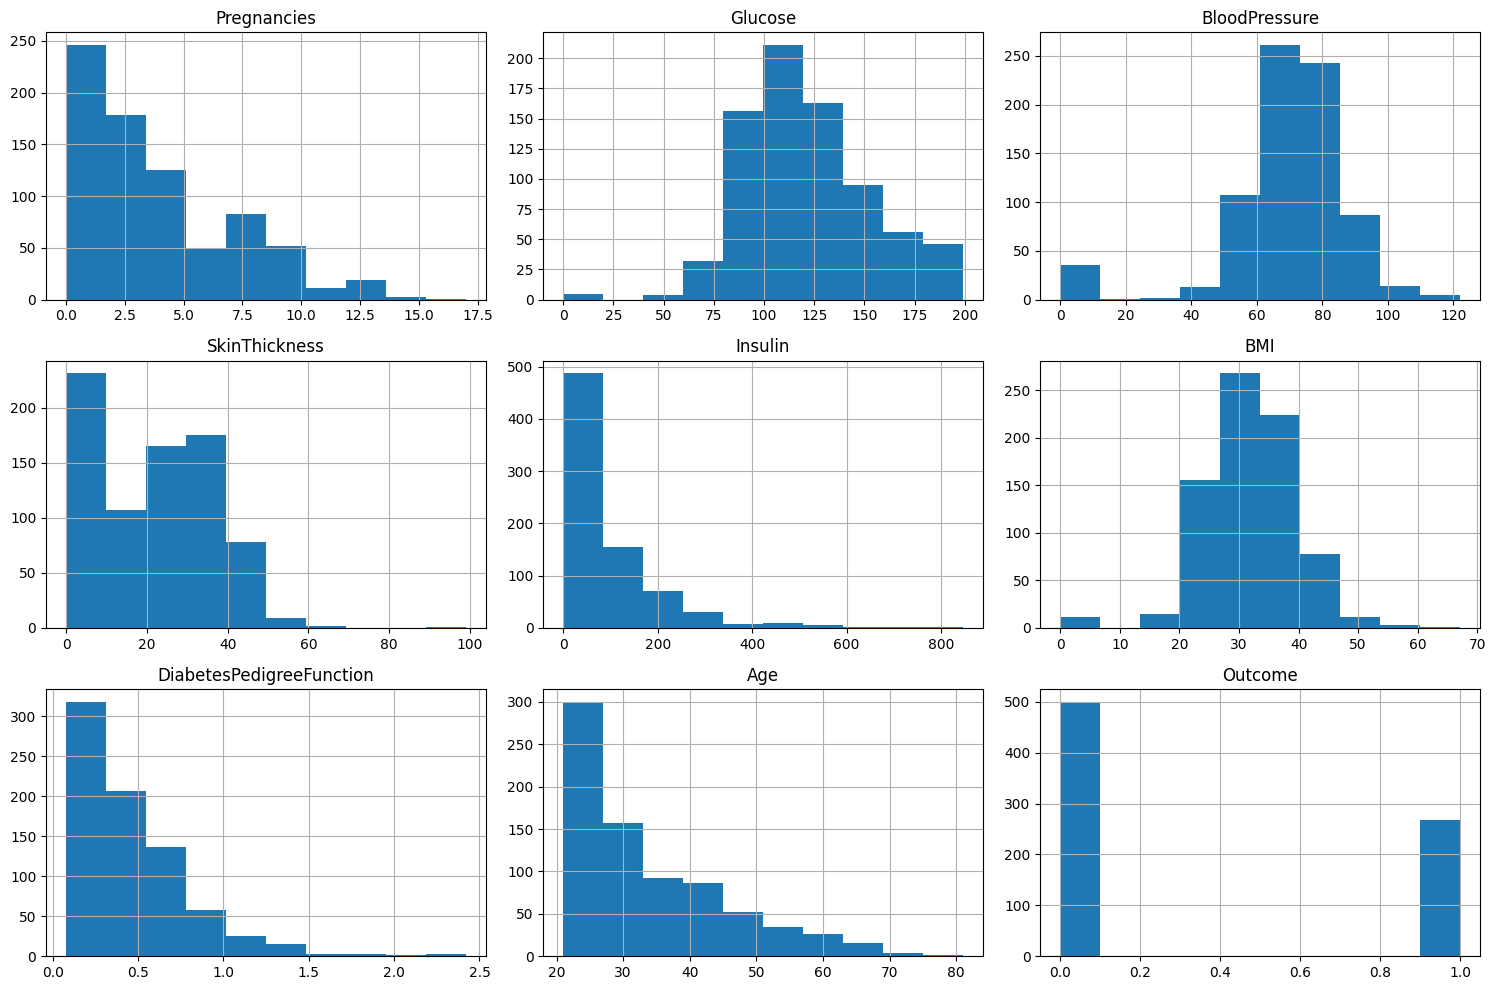

In [9]:
# @title
# plot all numerical columns of data to see each distribution individually
data.hist(figsize=(15,10))
plt.tight_layout()
plt.show()


In [10]:
# @title
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

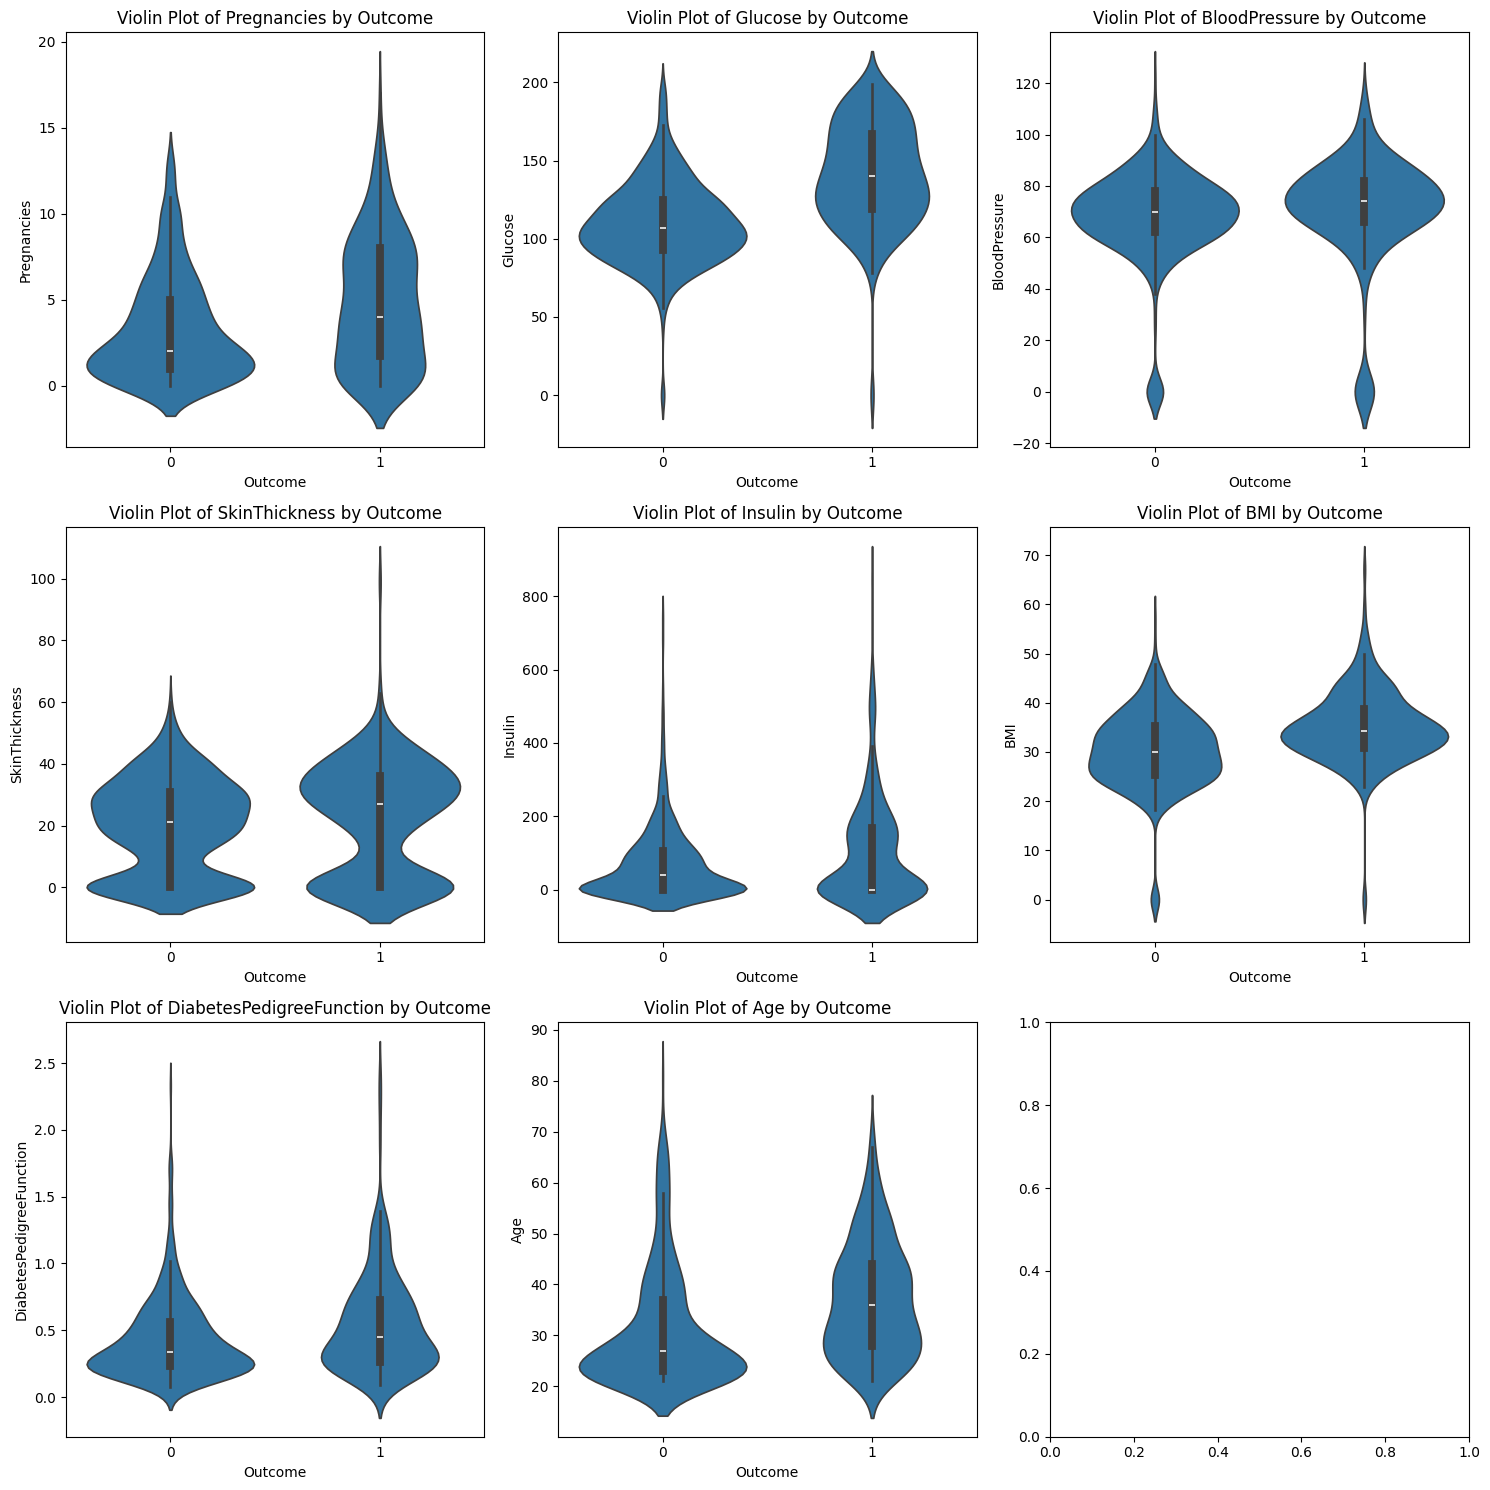

In [11]:
# @title

columns = data.columns[:-1]  # Assuming 'Outcome' is the last column

fig, axes = plt.subplots(3, 3, figsize=(15, 15))

# plotting each in a subplot - since outcome is a categorical value, we use violin plots to individually compare each
# column with it.

for idx, col in enumerate(columns):
    i, j = divmod(idx, 3)
    sns.violinplot(x='Outcome', y=col, data=data, ax=axes[i, j])
    axes[i, j].set_title(f'Violin Plot of {col} by Outcome')
    axes[i, j].set_ylabel(col)
    axes[i, j].set_xlabel('Outcome')

plt.tight_layout()
plt.show()


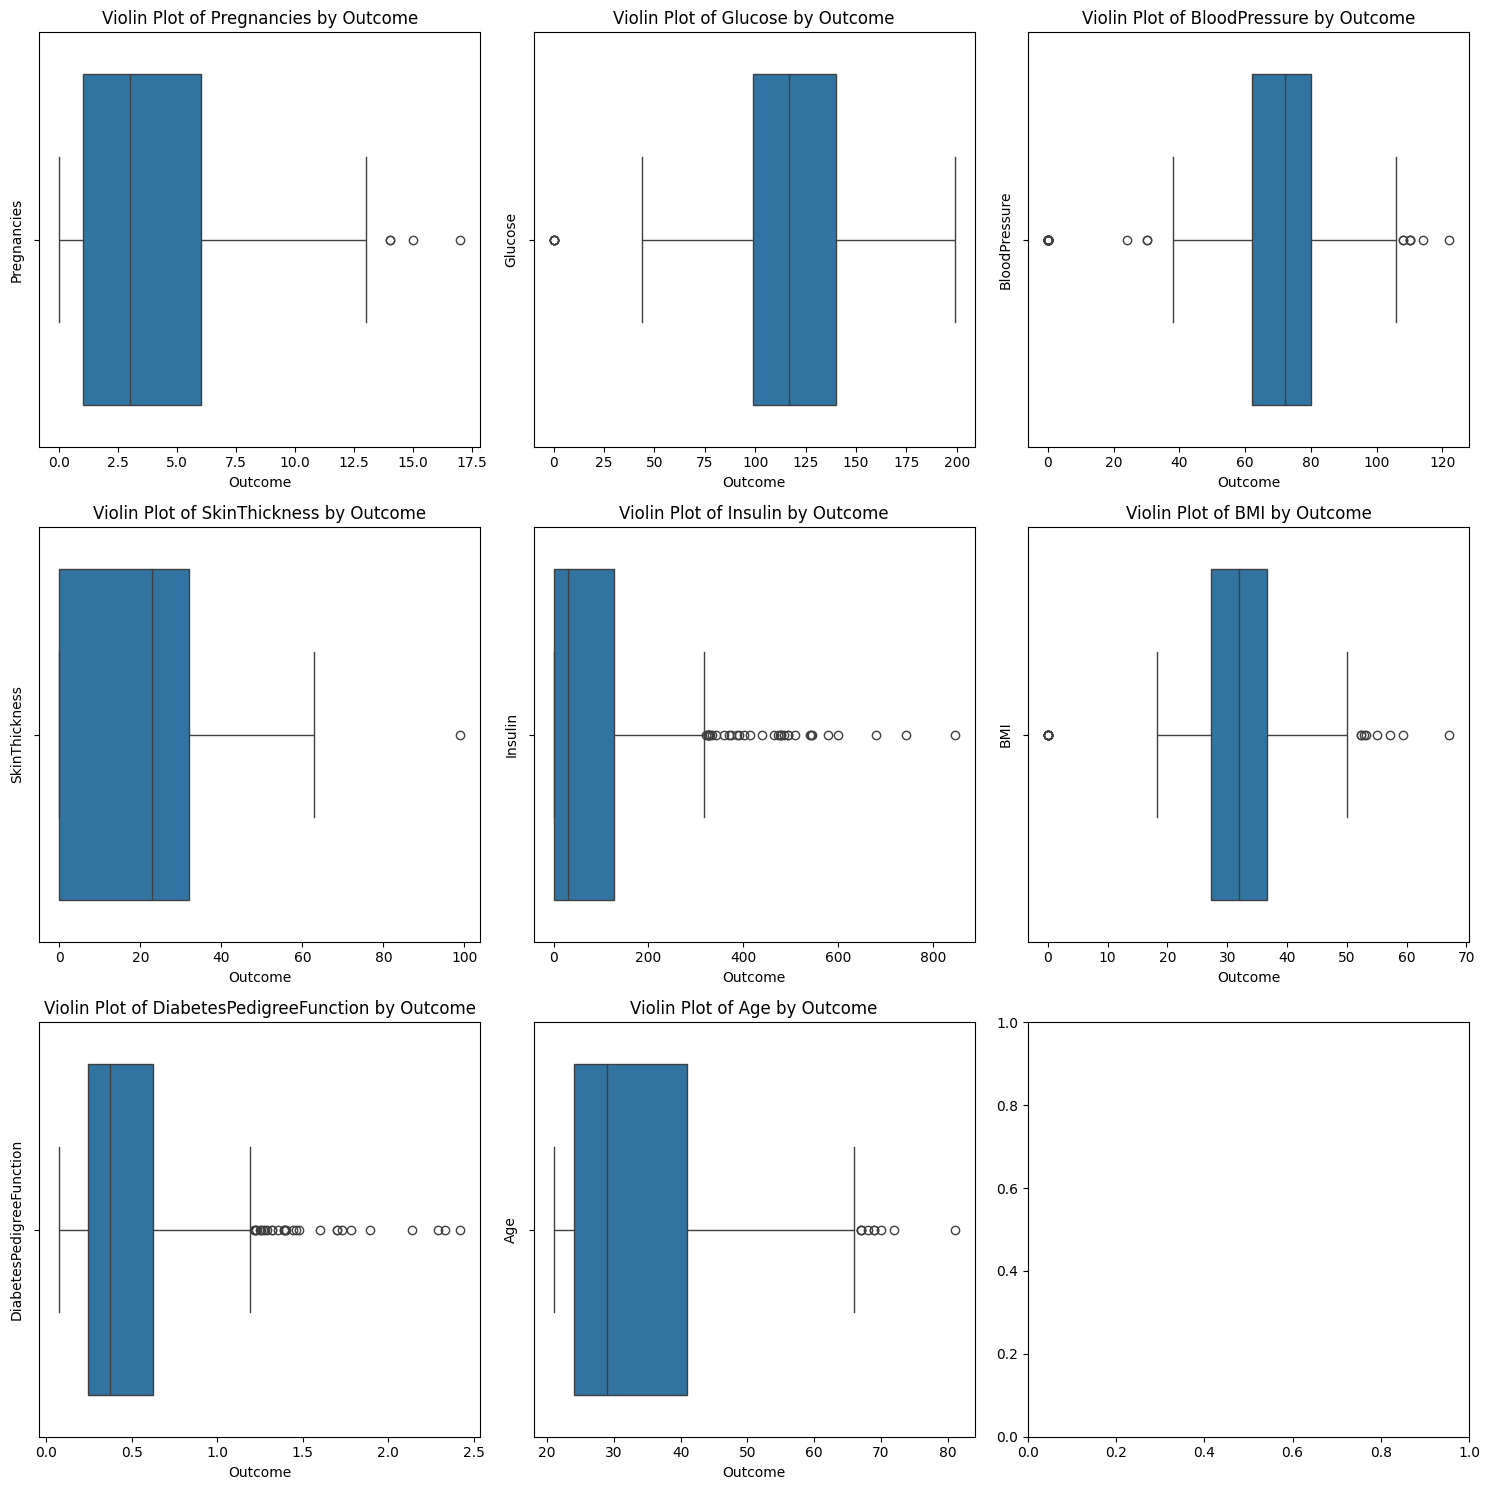

In [12]:
# @title
#plotting outliers of each column

fig, axes = plt.subplots(3, 3, figsize=(15, 15))

#boxplots to identify outliers
for idx, col in enumerate(columns):
    i, j = divmod(idx, 3)
    sns.boxplot(x=col, data=data, ax=axes[i, j])
    axes[i, j].set_title(f'Violin Plot of {col} by Outcome')
    axes[i, j].set_ylabel(col)
    axes[i, j].set_xlabel('Outcome')

plt.tight_layout()
plt.show()



In [13]:
# @title
"""
JUST CHECKING MORE ON OUTLIERS-

Q1 = data['Insulin'].quantile(0.25)
Q3 = data['Insulin'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

outliers_insulin = data[(data['Insulin'] < lower) | (data['Insulin'] > upper)]
normal_insulin = data[(data['Insulin'] >= lower) & (data['Insulin'] <= upper)]

high_insulin_non_diabetic = data[(data['Insulin'] > upper) & (data['Outcome'] == 0)]
low_insulin_non_diabetic = data[(data['Insulin'] > upper ) & (data['Outcome'] == 1)]
print(high_insulin_non_diabetic.mean(numeric_only=True))
print(low_insulin_non_diabetic.mean(numeric_only=True))

Q1 = data['DiabetesPedigreeFunction'].quantile(0.25)
Q3 = data['DiabetesPedigreeFunction'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

g = data[(data['DiabetesPedigreeFunction'] > upper) & (data['Outcome'] == 0 )]
k = data[(data['DiabetesPedigreeFunction'] > upper) & (data['Outcome'] == 1 )]
print(g.mean(numeric_only=True) - k.mean(numeric_only=True) )
print(k.mean(numeric_only=True))


outliers_insulin['Group'] = 'Outlier'
normal_insulin['Group'] = 'Normal'

compare_df = pd.concat([outliers_insulin, normal_insulin])

# Example: Compare Glucose, BMI, and Age
sns.boxplot(x='Group', y='Glucose', data=compare_df)
plt.title('Glucose Levels in Insulin Outliers vs Normal')
plt.show()

"""
# Use IQR method to identify outliers for numerical features:
for col in data.select_dtypes(include=np.number).columns:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[col] < lower_bound) | (data[col] > upper_bound)]
    print(f"Outliers in {col}: {outliers.shape[0]}")

Outliers in Pregnancies: 4
Outliers in Glucose: 5
Outliers in BloodPressure: 45
Outliers in SkinThickness: 1
Outliers in Insulin: 34
Outliers in BMI: 19
Outliers in DiabetesPedigreeFunction: 29
Outliers in Age: 9
Outliers in Outcome: 0


In [14]:
# @title
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [15]:
# @title
#just checking on how skewed each column is
data.skew()

,0
Pregnancies,0.901674
Glucose,0.173754
BloodPressure,-1.843608
SkinThickness,0.109372
Insulin,2.272251
BMI,-0.428982
DiabetesPedigreeFunction,1.919911
Age,1.129597
Outcome,0.635017


## Data PreProcessing

In [16]:
# @title
from scipy.stats.mstats import winsorize

# Lets impute nan values in column - (0 values)
#for columns - pregnancies, diabetespredegreefunction we are assuming 0 is valid
columns_to_impute = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'Age']



#remove the outliers through winsrorizing
"""for col in columns_to_impute:
  data[col] = winsorize(data[col], limits=[0.15, 0.15])
"""

#removing outliers through IQR

for col in data.columns[:-1]:
  Q1 = data[col].quantile(0.25)
  Q3 = data[col].quantile(0.75)

  IQR = Q3 - Q1

  lower = Q1 - 1.5 * IQR
  upper = Q3 + 1.5 * IQR
  data[col] = data[col].clip(lower = lower, upper = upper)

#used for xgboost later - (it works with nan data, so saving a copy before doing imputation seemed to be a good idea)
new_data = data.copy()

for col in columns_to_impute:
  new_data[col] = new_data[col].replace(0, np.nan)


#doing median imputation for the rest of the models used.
for col in columns_to_impute:
  print(col)
  median = data[data[col]!=0][col].median()
  data[col] = data[col].replace(0, median)



Glucose
BloodPressure
SkinThickness
Insulin
BMI
Age


# Splitting the Data

In [17]:
# @title

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = data.drop('Outcome', axis=1)
y = data['Outcome']


# the standrad scaling at this part was commented out-because, later in the code, we will be using
# seperate pipeline for each model, so doing scaling manually is unnecessary.
# scaler = StandardScaler()
# X = scaler.fit_transform(X)


# stratify=y part makes sure both training and test sets have similar proportions of diabetic and non-diabetic cases,
# which leads to more stable and fair results.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)
X_train.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
22,7.0,196.0,90,29,125.000,39.8,0.451,41.0
497,2.0,81.0,72,15,76.000,30.1,0.547,25.0
395,2.0,127.0,58,24,275.000,27.7,1.200,25.0
381,0.0,105.0,68,22,125.000,20.0,0.236,22.0
258,1.0,193.0,50,16,318.125,25.9,0.655,24.0


# Model Selection

*Logistic Regression* is a simple yet effective classification algorithm that models the probability of a binary outcome.
It gives interpretable results and handles linearly separable data well—ideal for getting a baseline accuracy on the diabetes dataset.

In [18]:
# @title
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression

#initializing logistic regression model
model = LogisticRegression(
    penalty='l2',       # L2 regularization (default)
    C=1.0,              # Inverse of regularization strength (↓C = ↑regularization)
    solver='lbfgs',
    max_iter=1000
)

#making a pipeline for logistic regression
logreg_pipeline = make_pipeline(StandardScaler(), model)
logreg_pipeline.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression(max_iter=1000))])

Note : Cross-validation checks how well model works on unseen data by splitting data into multiple parts, training on some, and testing on others.

Accuracy metrics like the confusion matrix (showing correct and incorrect predictions) and the classification report (giving precision, recall, and F1-score for each class) help you understand how accurately model is classifying things. These tools give a more reliable idea of model's performance than just testing on the data it was trained on.

In [19]:
# @title
# helper function for cross-validation
from sklearn.model_selection import cross_val_score

def cross_validation(model_pipeline):
  scores = cross_val_score(model_pipeline, X, y, cv=5, scoring='accuracy')

  print(f"Cross-validated accuracy: {scores.mean():.4f}")
  print(f"Standard deviation: {scores.std():.4f}")


In [20]:
# @title
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

#helper function for further metric claculation
def evaluate_model(y_test, y_pred):
  print("Accuracy" , accuracy_score(y_test, y_pred))
  print("classification report", classification_report(y_test, y_pred))
  print("Confusion Matrix")
  cm = confusion_matrix(y_test, y_pred)
  plt.figure(figsize=(6,4))
  sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
  plt.xlabel('Predicted')
  plt.ylabel('Actual')
  plt.title('Confusion matrix')
  plt.show()

In [21]:
# @title
#calling the funtion - to do cross validation
cross_validation(logreg_pipeline)

Cross-validated accuracy: 0.7605
Standard deviation: 0.0167


Accuracy 0.7597402597402597
classification report               precision    recall  f1-score   support

           0       0.78      0.88      0.83       100
           1       0.71      0.54      0.61        54

    accuracy                           0.76       154
   macro avg       0.74      0.71      0.72       154
weighted avg       0.75      0.76      0.75       154

Confusion Matrix


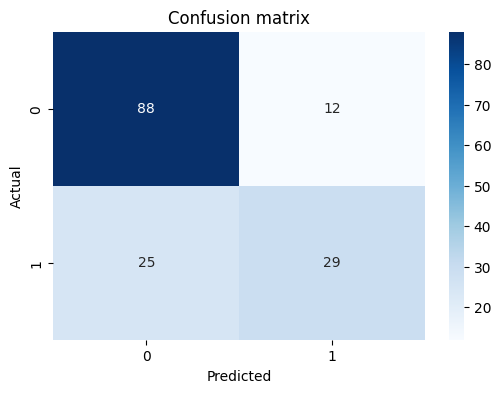

In [22]:
# @title
#calling the function - to run other metrics on the model
evaluate_model(y_test, logreg_pipeline.predict(X_test))

**Support Vector Machine (SVM)**

*Support Vector Machine (SVM)* finds the best boundary (hyperplane) that separates the classes. It's effective in high-dimensional spaces and works well when the data is not too noisy.



In [23]:
# @title
from sklearn.svm import SVC

#initializing svm model

svm_model = SVC(kernel='linear', C=1)  # RBF is default

svm_pipeline = make_pipeline(StandardScaler(), svm_model)
svm_pipeline.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(C=1, kernel='linear'))])

Cross-validated accuracy: 0.7631
Standard deviation: 0.0141
Accuracy 0.7662337662337663
classification report               precision    recall  f1-score   support

           0       0.79      0.88      0.83       100
           1       0.71      0.56      0.62        54

    accuracy                           0.77       154
   macro avg       0.75      0.72      0.73       154
weighted avg       0.76      0.77      0.76       154

Confusion Matrix


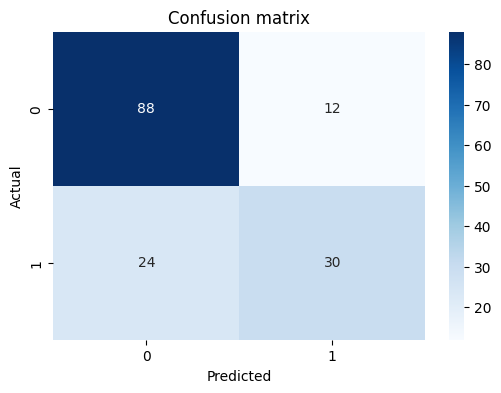

In [24]:
# @title
cross_validation(svm_pipeline)
evaluate_model(y_test, svm_pipeline.predict(X_test))

**K-Nearest Neighbors**

*K-Nearest Neighbors* is a non-parametric algorithm that classifies a sample based on the majority label among its k-nearest neighbors. It’s simple and intuitive but can be sensitive to irrelevant features and scaling.

In [25]:
# @title
#doing classification with KNN
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors=7)

knn_pipeline = make_pipeline(StandardScaler(), knn_model)

knn_pipeline.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kneighborsclassifier', KNeighborsClassifier(n_neighbors=7))])

Cross-validated accuracy: 0.7370
Standard deviation: 0.0250
Accuracy 0.7857142857142857
classification report               precision    recall  f1-score   support

           0       0.81      0.88      0.84       100
           1       0.73      0.61      0.67        54

    accuracy                           0.79       154
   macro avg       0.77      0.75      0.75       154
weighted avg       0.78      0.79      0.78       154

Confusion Matrix


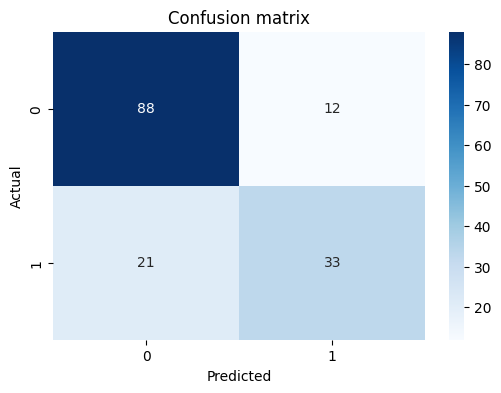

In [26]:
# @title
cross_validation(knn_model)
evaluate_model(y_test, knn_pipeline.predict(X_test))

**Decision Trees**

*Decision Tree* is a tree-based algorithm that splits the data based on feature values to make decisions. It’s easy to understand and interpret but prone to overfitting if not pruned or regularized.


In [27]:
# @title
#trying decision tree for classification
from sklearn.tree import DecisionTreeClassifier

dt_pipeline = make_pipeline(DecisionTreeClassifier(random_state=0))
dt_pipeline.fit(X_train, y_train)

Pipeline(steps=[('decisiontreeclassifier',
                 DecisionTreeClassifier(random_state=0))])

Cross-validated accuracy: 0.7097
Standard deviation: 0.0388
Accuracy 0.7337662337662337
classification report               precision    recall  f1-score   support

           0       0.79      0.81      0.80       100
           1       0.63      0.59      0.61        54

    accuracy                           0.73       154
   macro avg       0.71      0.70      0.70       154
weighted avg       0.73      0.73      0.73       154

Confusion Matrix


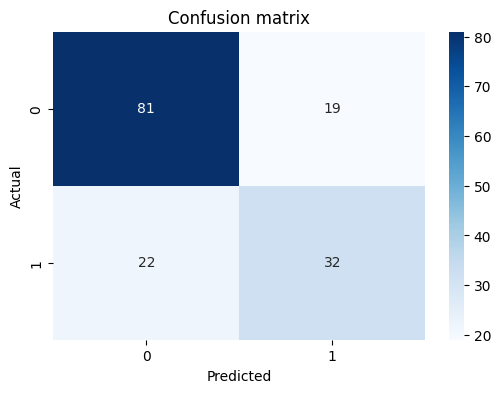

In [28]:
# @title
cross_validation(dt_pipeline)
evaluate_model(y_test, dt_pipeline.predict(X_test))

**Naive Bayes**

*Naive Bayes* is a probabilistic classifier based on Bayes’ Theorem with the “naive” assumption of feature independence. It’s very fast and performs well on small datasets, especially when the features are conditionally independent.

In [29]:
# @title
#trying naive bayes
from sklearn.naive_bayes import GaussianNB

nb_pipeline = make_pipeline(GaussianNB())
nb_pipeline.fit(X_train, y_train)

Pipeline(steps=[('gaussiannb', GaussianNB())])

Cross-validated accuracy: 0.7487
Standard deviation: 0.0199
Accuracy 0.7662337662337663
classification report               precision    recall  f1-score   support

           0       0.80      0.85      0.83       100
           1       0.69      0.61      0.65        54

    accuracy                           0.77       154
   macro avg       0.74      0.73      0.74       154
weighted avg       0.76      0.77      0.76       154

Confusion Matrix


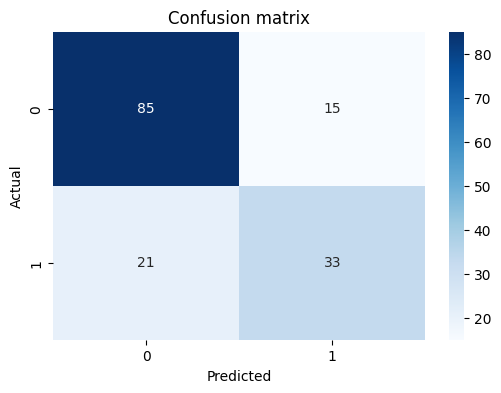

In [30]:
# @title
cross_validation(nb_pipeline)
evaluate_model(y_test, nb_pipeline.predict(X_test))

**Random Forest**

*Random Forest* is an ensemble method that builds multiple decision trees and combines their results for more stable and accurate predictions. It reduces overfitting and works well with most types of data.

In [31]:
# @title
#trying with random forest
from sklearn.ensemble import RandomForestClassifier

rf_pipeline = make_pipeline(RandomForestClassifier(n_estimators=100, random_state=0))
rf_pipeline.fit(X_train, y_train)

Pipeline(steps=[('randomforestclassifier',
                 RandomForestClassifier(random_state=0))])

Cross-validated accuracy: 0.7696
Standard deviation: 0.0389
Accuracy 0.7857142857142857
classification report               precision    recall  f1-score   support

           0       0.80      0.89      0.84       100
           1       0.74      0.59      0.66        54

    accuracy                           0.79       154
   macro avg       0.77      0.74      0.75       154
weighted avg       0.78      0.79      0.78       154

Confusion Matrix


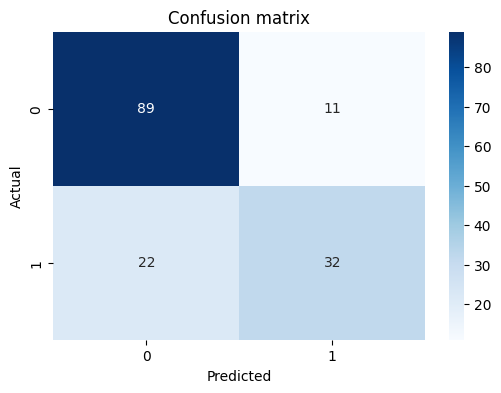

In [32]:
# @title
cross_validation(rf_pipeline)
evaluate_model(y_test, rf_pipeline.predict(X_test))

**XGBoost (Extreme Gradient Boosting)**

*XGBoost (Extreme Gradient Boosting)* is a powerful and efficient implementation of gradient boosting that builds trees sequentially, each trying to correct the errors of the previous one. It’s known for its high performance and speed on structured/tabular data.


Cross-validated accuracy: 0.7540
Standard deviation: 0.0306
Accuracy 0.7077922077922078
classification report               precision    recall  f1-score   support

           0       0.80      0.73      0.76        99
           1       0.58      0.67      0.62        55

    accuracy                           0.71       154
   macro avg       0.69      0.70      0.69       154
weighted avg       0.72      0.71      0.71       154

Confusion Matrix


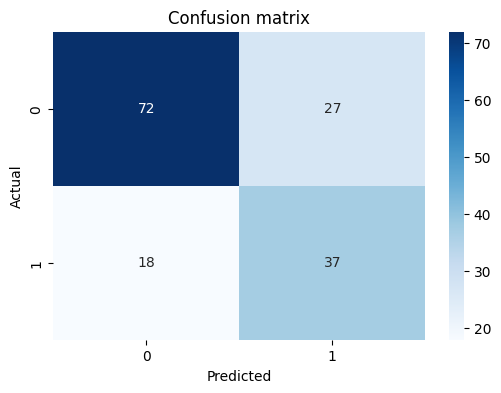

In [34]:
# @title
from xgboost import XGBClassifier
from sklearn.pipeline import make_pipeline

X_new = new_data.drop('Outcome', axis=1)
y_new = new_data['Outcome']

X_train_n, X_test_n, y_train_n, y_test_n = train_test_split(X_new, y_new, test_size=0.2, random_state=42) # Example test_size and random_state
xgb_model = XGBClassifier(
    n_estimators=100,
    max_depth=4,
    learning_rate=0.1,
    eval_metric='logloss',
    random_state=0
)

xgb_pipeline = make_pipeline(xgb_model)

xgb_pipeline.fit(X_train_n, y_train_n)
y_pred = xgb_pipeline.predict(X_test_n)

cross_validation(xgb_pipeline)
evaluate_model(y_test_n, y_pred)


* **Conclusion**

We applied several classification algorithms to predict diabetes, including Logistic Regression, SVM, KNN, Decision Trees, Naive Bayes, Random Forest, and XGBoost. All models performed similarly, with accuracies around 76–77%, showing consistent results across approaches. While some models offered better interpretability or robustness, the overall performance indicates the dataset’s predictive limit without further feature engineering. Cross-validation and evaluation metrics helped ensure reliable model comparison.

